# 05 overpass-turbo.eu comparisons

***2 Sep 2020***

This notebook compares results from osmnx's new `geometries_from_XXXX()` functions to results running the same query on https://overpass-turbo.eu.

### Notes:

1. OSMnx only processes multipolygon relations. The equivalent query on overpass-turbo is:
`(type:node or type:way or (type:relation and type=multipolygon)) and amenity=school in Berlin`
2. The polygon results on the overpass-turbo homepage include polygons and multipolygons
3. OSMnx will only assemble MultiPolygons where member geometries are acurately tagged with a `role`
4. If both relation and component ways are tagged (they shouldn't be) OSMnx will return both
5. Possible issue with boundary though not clear where it comes from

In [1]:
%load_ext autoreload
%autoreload 2

# imports
import osmnx as ox # new `geometries` branch
import geopandas as gpd
import pandas as pd

# configuration
ox.utils.config(use_cache=True, log_console=True)
pd.set_option('display.max_columns', None)

# helper functions
from helper_functions import carto_plot, comparison_report

local_file_path = '/media/nick/WDBlue/osmnx/overpass_turbo_results/'

## Schools in Berlin

### overpass-turbo.eu wizard query and result:

`(type:node or type:way or (type:relation and type=multipolygon)) and amenity=school in Berlin`

- points: 134
- lines: 0
- poligons: 981

### Notes

- None, exact match

In [5]:
%time
place = 'Berlin, Germany'
tags={'amenity': 'school'}
# run the query through geometries_from_place
query_polygon = ox.geocode_to_gdf(place)
osmnx_result = ox.geometries_from_place(place, tags)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.39 µs


In [6]:
# Read in the overpass-turbo.eu result
overpassturbo_result = gpd.read_file(local_file_path + 'schools_in_berlin.geojson')

In [7]:
comparison_report(osmnx_result, overpassturbo_result, query_polygon)

1115 ids that are in both GeoDataFrames

0 ids that are not in both GeoDataFrames

ids not in overpassturbo_result:
[]
ids not in osmnx_result:
[] 

         osmnx  overpass-turbo
Polygon    981             981
Point      134             134


## Hospitals in Ghana

### overpass-turbo.eu wizard query and result:

`(type:node or type:way or (type:relation and type=multipolygon)) and amenity=hospital in Ghana`

- points: 34
- lines: 0
- poligons: 294

### Notes

- Takes a long time to run the r-tree spatial index for a whole country despite the small number of geometries returned
- Otherwise, exact match

In [8]:
%time
place = 'Ghana'
tags={'amenity': 'hospital'}
# run the query through geometries_from_place
query_polygon = ox.geocode_to_gdf(place)
osmnx_result = ox.geometries_from_place(place, tags)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.77 µs


In [9]:
# Read in the overpass-turbo.eu result
overpassturbo_result = gpd.read_file(local_file_path + 'hospitals_in_ghana.geojson')

In [12]:
comparison_report(osmnx_result, overpassturbo_result, query_polygon)

328 ids that are in both GeoDataFrames

0 ids that are not in both GeoDataFrames

ids not in overpassturbo_result:
[]
ids not in osmnx_result:
[] 

              osmnx  overpass-turbo
Polygon         293             293
Point            34              34
MultiPolygon      1               1


## Lakes in the Lakes

### overpass-turbo.eu wizard query and result:

`(type:node or type:way or (type:relation and type=multipolygon)) and natural=water in 'Lake District National Park'`

- points: 1
- lines: 1
- poligons:1143

### Notes

- The additional geometry created by osmnx was because the natural=water tag on the multipolygon relation was duplicated on the outer way
- overpass-turbo presumably has some way of filtering out these duplicates

In [13]:
%%time
place = 'Lake District National Park'
tags={'natural': 'water'}
# run the query through geometries_from_place
query_polygon = ox.geocode_to_gdf(place)
osmnx_result = ox.geometries_from_place(place, tags)

CPU times: user 2.09 s, sys: 8.03 ms, total: 2.1 s
Wall time: 2.12 s


In [14]:
# Read in the overpass-turbo.eu result
overpassturbo_result = gpd.read_file(local_file_path + 'lakes_in_the_lakes.geojson')

1145 ids that are in both GeoDataFrames

1 ids that are not in both GeoDataFrames

ids not in overpassturbo_result:
['https://www.openstreetmap.org/way/4579452']
ids not in osmnx_result:
[] 

              osmnx  overpass-turbo
Polygon        1143            1142
MultiPolygon      1               1
LineString        1               1
Point             1               1


/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


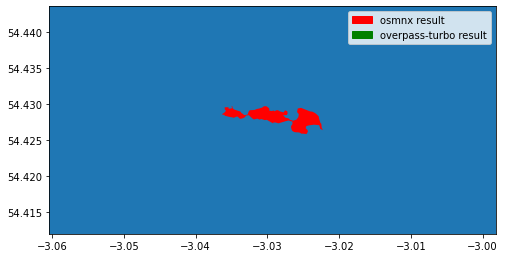

In [15]:
comparison_report(osmnx_result, overpassturbo_result, query_polygon)

## Religious, Rome

### overpass-turbo.eu wizard query and result:

`(type:node or type:way or (type:relation and type=multipolygon)) and (landuse=religious or amenity=place_of_worship) in 'Rome'`

- points: 82
- lines: 0
- poligons: 635

### Notes

- Not clear why overpass-tubo didn't return:
    - https://www.openstreetmap.org/way/111797279 a building tagged with amenity=place_of_worship
    - https://www.openstreetmap.org/relation/8038348 a multipolygon relation tagged with landuse=religious



In [16]:
%%time
place = 'Rome'
tags = {'landuse': 'religious', 'amenity': 'place_of_worship'}
# run the query through geometries_from_place
query_polygon = ox.geocode_to_gdf(place)
osmnx_result = ox.geometries_from_place(place, tags)

CPU times: user 1.12 s, sys: 3.97 ms, total: 1.13 s
Wall time: 1.13 s


In [17]:
# Read in the overpass-turbo.eu result
overpassturbo_result = gpd.read_file(local_file_path + 'religious_in_rome.geojson')

717 ids that are in both GeoDataFrames

2 ids that are not in both GeoDataFrames

ids not in overpassturbo_result:
['https://www.openstreetmap.org/way/111797279', 'https://www.openstreetmap.org/relation/8038348']
ids not in osmnx_result:
[] 

              osmnx  overpass-turbo
Polygon       637.0             634
Point          82.0              82
MultiPolygon    NaN               1


/home/nick/anaconda3/envs/osmnx-dev/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


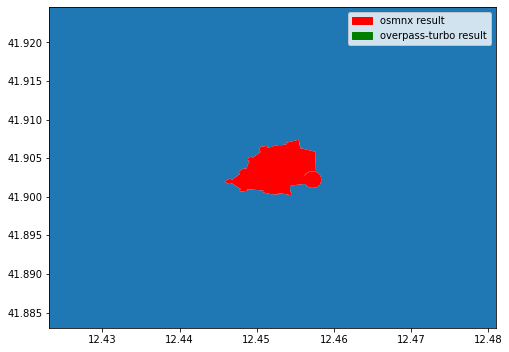

In [18]:
comparison_report(osmnx_result, overpassturbo_result, query_polygon)

## Living streets in Denmark

### overpass-turbo.eu wizard query and result:

`(type:node or type:way or (type:relation and type=multipolygon)) and highway=living_street in 'Denmark'`

- points: 0
- lines: 1858
- poligons: 0

### Notes

- Slow due to spatial indexing of whole country
- Exact match

In [19]:
%%time
place = 'Denmark'
tags = {'highway':'living_street'}
# run the query through geometries_from_place
query_polygon = ox.geocode_to_gdf(place)
osmnx_result = ox.geometries_from_place(place, tags)

CPU times: user 1min 12s, sys: 123 ms, total: 1min 12s
Wall time: 1min 12s


In [20]:
# Read in the overpass-turbo.eu result
overpassturbo_result = gpd.read_file(local_file_path + 'living_streets_in_denmark.geojson')

In [21]:
comparison_report(osmnx_result, overpassturbo_result, query_polygon)

1858 ids that are in both GeoDataFrames

0 ids that are not in both GeoDataFrames

ids not in overpassturbo_result:
[]
ids not in osmnx_result:
[] 

            osmnx  overpass-turbo
LineString   1858            1858


## Buildings in Lubumbashi

### overpass-turbo.eu wizard query and result:

`(type:node or type:way or (type:relation and type=multipolygon)) and building=* in 'Lubumbashi'`

- points: 5
- lines: 0
- poligons: 54745

### Notes

- The extra buildings in the osmnx result lie along one edge of the boundary
- They do intersect with the boundary so should be included
- The boundary is not shown overlapping the buildings on OSM https://www.openstreetmap.org/relation/5399777#map=16/-11.6907/27.4569
- Seems to be an issue with the boundary.

In [22]:
%%time
place = 'Lubumbashi'
tags = {'building':True}
# run the query through geometries_from_place
query_polygon = ox.geocode_to_gdf(place)
osmnx_result = ox.geometries_from_place(place, tags)

CPU times: user 11.5 s, sys: 224 ms, total: 11.7 s
Wall time: 11.8 s


In [23]:
# Read in the overpass-turbo.eu result
overpassturbo_result = gpd.read_file(local_file_path + 'buildings_in_lubumbashi.geojson')

54748 ids that are in both GeoDataFrames

27 ids that are not in both GeoDataFrames

ids not in overpassturbo_result:
['https://www.openstreetmap.org/way/364383241', 'https://www.openstreetmap.org/way/363130455', 'https://www.openstreetmap.org/way/363130406', 'https://www.openstreetmap.org/way/364383172', 'https://www.openstreetmap.org/way/362346286', 'https://www.openstreetmap.org/way/363373139', 'https://www.openstreetmap.org/way/363130400', 'https://www.openstreetmap.org/way/363373138', 'https://www.openstreetmap.org/way/364383230', 'https://www.openstreetmap.org/way/364383226', 'https://www.openstreetmap.org/way/363373140', 'https://www.openstreetmap.org/way/364383187', 'https://www.openstreetmap.org/way/362346498', 'https://www.openstreetmap.org/way/364383217', 'https://www.openstreetmap.org/way/363046865', 'https://www.openstreetmap.org/way/363373141', 'https://www.openstreetmap.org/way/364383183', 'https://www.openstreetmap.org/way/362346497', 'https://www.openstreetmap.org/way/

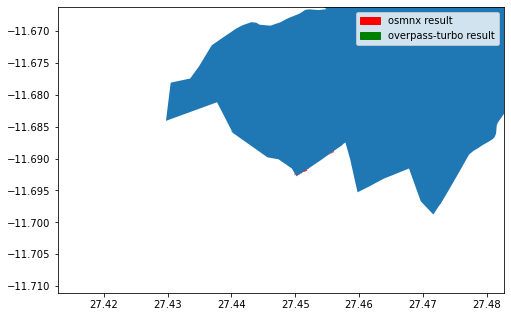

In [24]:
comparison_report(osmnx_result, overpassturbo_result, query_polygon)

(-11.7, -11.68)

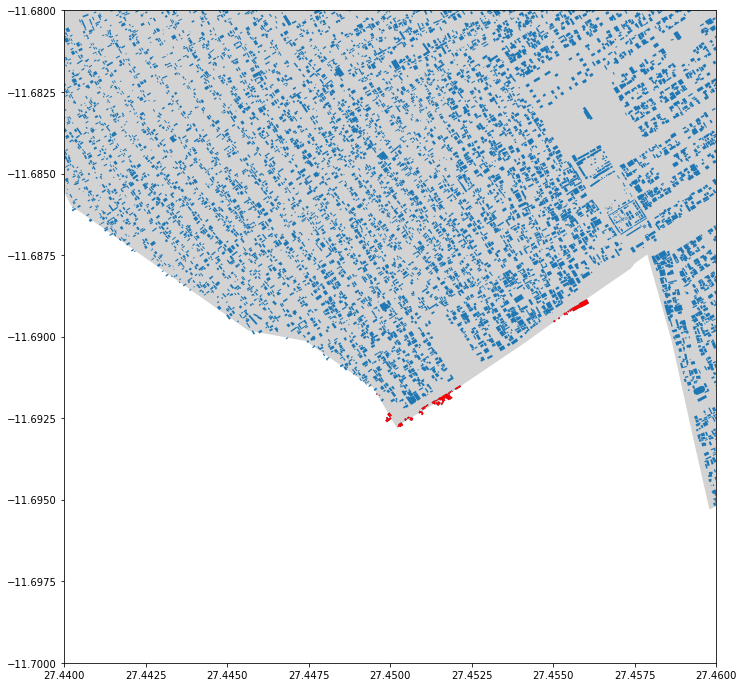

In [26]:
ax = query_polygon.plot(figsize=(12,12), color='lightgrey')
osmnx_result.plot(ax=ax)
osmnx_result[~osmnx_result['unique_id'].isin(overpassturbo_result['@id'])].plot(ax=ax, color='red')

ax.set_xlim(left=27.44, right=27.46)
ax.set_ylim(top=-11.68, bottom=-11.70)